

# Project: Investigate a Dataset (no show appointment dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction




#### Selected dataset: No-show appointments
Dataset Description: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### questions asked?
the dataset could be used o answerr many quetions as:
* is having a scholarship a factor?
* is having a certain disease a factor?
* which gender is more likely to show up ?
* is age a factor to no show?
* which Scheduled Day is more likely not to show?
* is receiving a sms a factoris receiving a sms a factor?
* is nigbourhood a factor not to show?
* is being handcapped a factor not to show?

we could aslo relate factors like 
* which nighbourhood has more handcaped people ?
* or which gender has more Alcoholism?
* or where do most of people with diabetes live ?

#### I have chosen 4 questions to answer?

1-is age a factor to no show?

2-which Scheduled Day is more likely not to show?

3-is receiving a sms a factoris receiving a sms a factor?

3- is nigbourhood a factor not to show?

### Data Wrangling
the data was clean no NAN values or duplicates, but it had logically wrong values for the age as it have patients with age =-1 so they were removed

what I have done to invsegate those question
first I have seperated the data to 2 dataframes for the no show and show values then I've made a comprisions using charts below

### conclusion
#### results
* Age: age is factor , young people seems to show up less there's a 4 year differce in th mean of the 2 groups and the highest ration of no shower between 30 and 10

* Day: doesn't seem to be a factor

* Reciving a sms: receiving a sms seems to have a negative effect on the showing ratio but doesn't have to be corelated

* Nigbourhood: some nighbourhood have more showing up ratios more than the others as "jardim camburi "

#### Limitations
* Most of the data is catagorial which doesn't allow for advanced statisitical calculations

* not much of details eg. for recieving sms, we don't konw when did are they sent, if they are targeting non showers

* thus we can't correlate most of our data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Data Wrangling

### General Properties

In [2]:
# genral look to understand data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(6)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning 

In [4]:
#checing if there's Nan values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
#checking if there's duplicates
df.duplicated(subset=['AppointmentID']).sum()

0

In [6]:
#removing outliers
df=df[df['Age']>0]
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#seprating the data into 2 dataframes based on the no show value
df_yes=df[df['No-show']=='Yes']
df_no=df[df['No-show']=='No']

In [8]:
#creating a function for chart comprison  between the no show and show dataframes
def stacked_chart(column,n):
    df_yes[column].value_counts().plot(figsize=(n,n),kind='bar',alpha=0.5,color='blue',label ='no show')
    df_no[column].value_counts().plot(figsize=(n,n),kind='bar',alpha=0.5,color='red',label ='showed' )
    plt.legend()
    plt.title( column +'  comparison')
    plt.xlabel( column )
    plt.ylabel('patients')
    plt.show()


## Exploratory Data Analysis


### is age a factor to no show

In [9]:
#getting the mean of each group
df.groupby('No-show')['Age'].mean()

No-show
No     39.075187
Yes    35.329151
Name: Age, dtype: float64

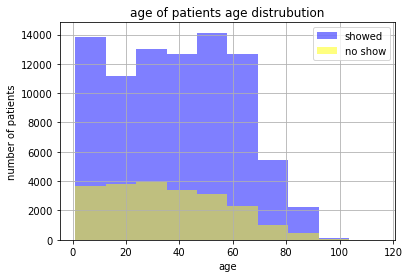

In [10]:
df_no['Age'].hist(alpha=0.5,color='blue',label ='showed')
df_yes['Age'].hist(alpha=0.5,color='yellow',label ='no show')
plt.title("age of patients age distrubution")
plt.xlabel('age') 
plt.ylabel('number of patients') 
plt.legend()

age distrubtion between 2 groups seems to be different

Text(0, 0.5, 'number of patients')

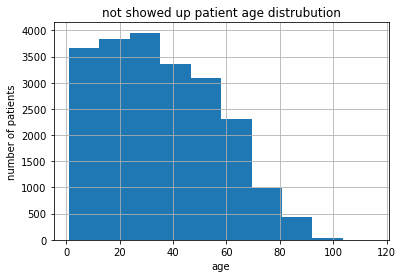

In [11]:
df_yes['Age'].hist()
plt.title("not showed up patient age distrubution")
plt.xlabel('age') 
plt.ylabel('number of patients') 

In [12]:
df_yes['Age'].describe()

count    21680.000000
mean        35.329151
std         21.470631
min          1.000000
25%         18.000000
50%         33.000000
75%         52.000000
max        115.000000
Name: Age, dtype: float64

In [13]:
df_no['Age'].describe()

count    85307.000000
mean        39.075187
std         22.649713
min          1.000000
25%         20.000000
50%         39.000000
75%         57.000000
max        115.000000
Name: Age, dtype: float64

##### age is factor , young people seems to show up less with the highest ration of no shower between 30 and 10

### which ScheduledDay is more likely not to show

In [14]:
df_yes['ScheduledDay']=pd.to_datetime(df_yes['ScheduledDay'])
df_no['ScheduledDay']=pd.to_datetime(df_no['ScheduledDay'])

df_yes['day']=df_yes['ScheduledDay'].dt.day_name()
df_no['day']=df_no['ScheduledDay'].dt.day_name()


<ipython-input-14-972b05029cc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes['ScheduledDay']=pd.to_datetime(df_yes['ScheduledDay'])
<ipython-input-14-972b05029cc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no['ScheduledDay']=pd.to_datetime(df_no['ScheduledDay'])
<ipython-input-14-972b05029cc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Text(0, 0.5, 'number of patients')

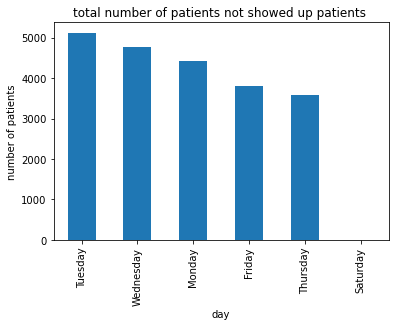

In [15]:
df_yes['day'].value_counts().plot(kind='bar')
plt.title("total number of patients not showed up patients ")
plt.xlabel('day') 
plt.ylabel('number of patients') 

Text(0, 0.5, 'number of patients')

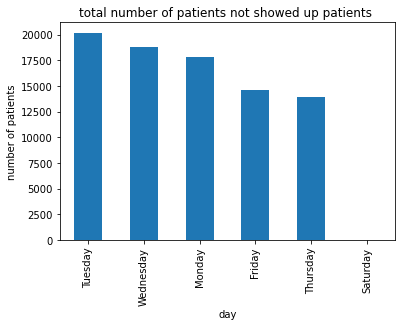

In [16]:
df_no['day'].value_counts().plot(kind='bar')
plt.title("total number of patients not showed up patients ")
plt.xlabel('day') 
plt.ylabel('number of patients') 

days capcity doesn't seem to be different 

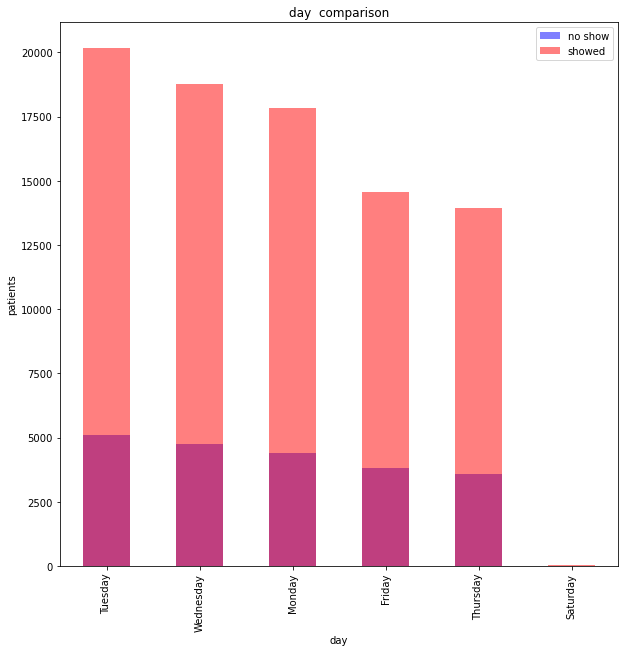

In [17]:
stacked_chart('day',10)

In [18]:
df_yes['day'].value_counts()/df_no['day'].value_counts()

Tuesday      0.253844
Wednesday    0.253340
Monday       0.247729
Friday       0.260392
Thursday     0.257627
Saturday     0.047619
Name: day, dtype: float64

##### Day doesn't seem to be a factor

### is receiving a sms a factor

In [19]:
df[['SMS_received','No-show']].value_counts()

SMS_received  No-show
0             No         60290
1             No         25017
0             Yes        12112
1             Yes         9568
dtype: int64

In [20]:
#getting the percentage of how much showed when a sms was sent vs didn't recive a sms
sms=df[['SMS_received','No-show']].value_counts().tolist()
no_sms_percentage=sms[2]/sms[0]
sms_sent_percentage=sms[3]/sms[1]
print(no_sms_percentage,sms_sent_percentage)

0.20089567092386798 0.38245992724947037


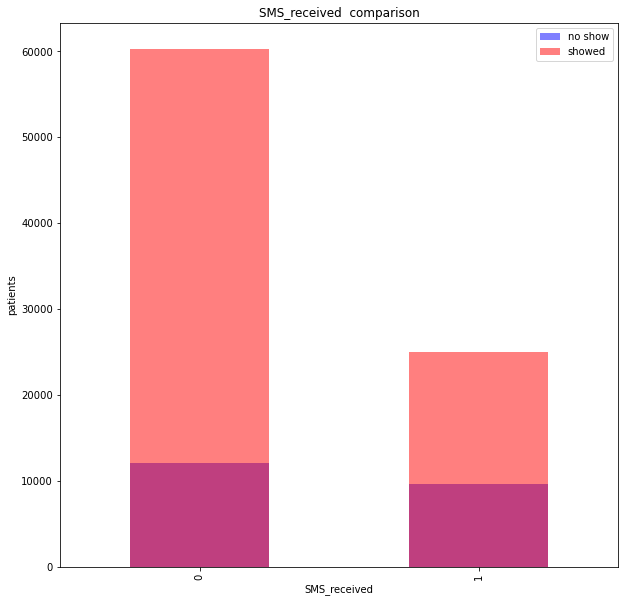

In [21]:
stacked_chart('SMS_received',10)

##### Reciving a sms: receiving a sms seems to have a negative effect on the showing ratio but doesn't have to be corelated

# is nigbourhood a factor

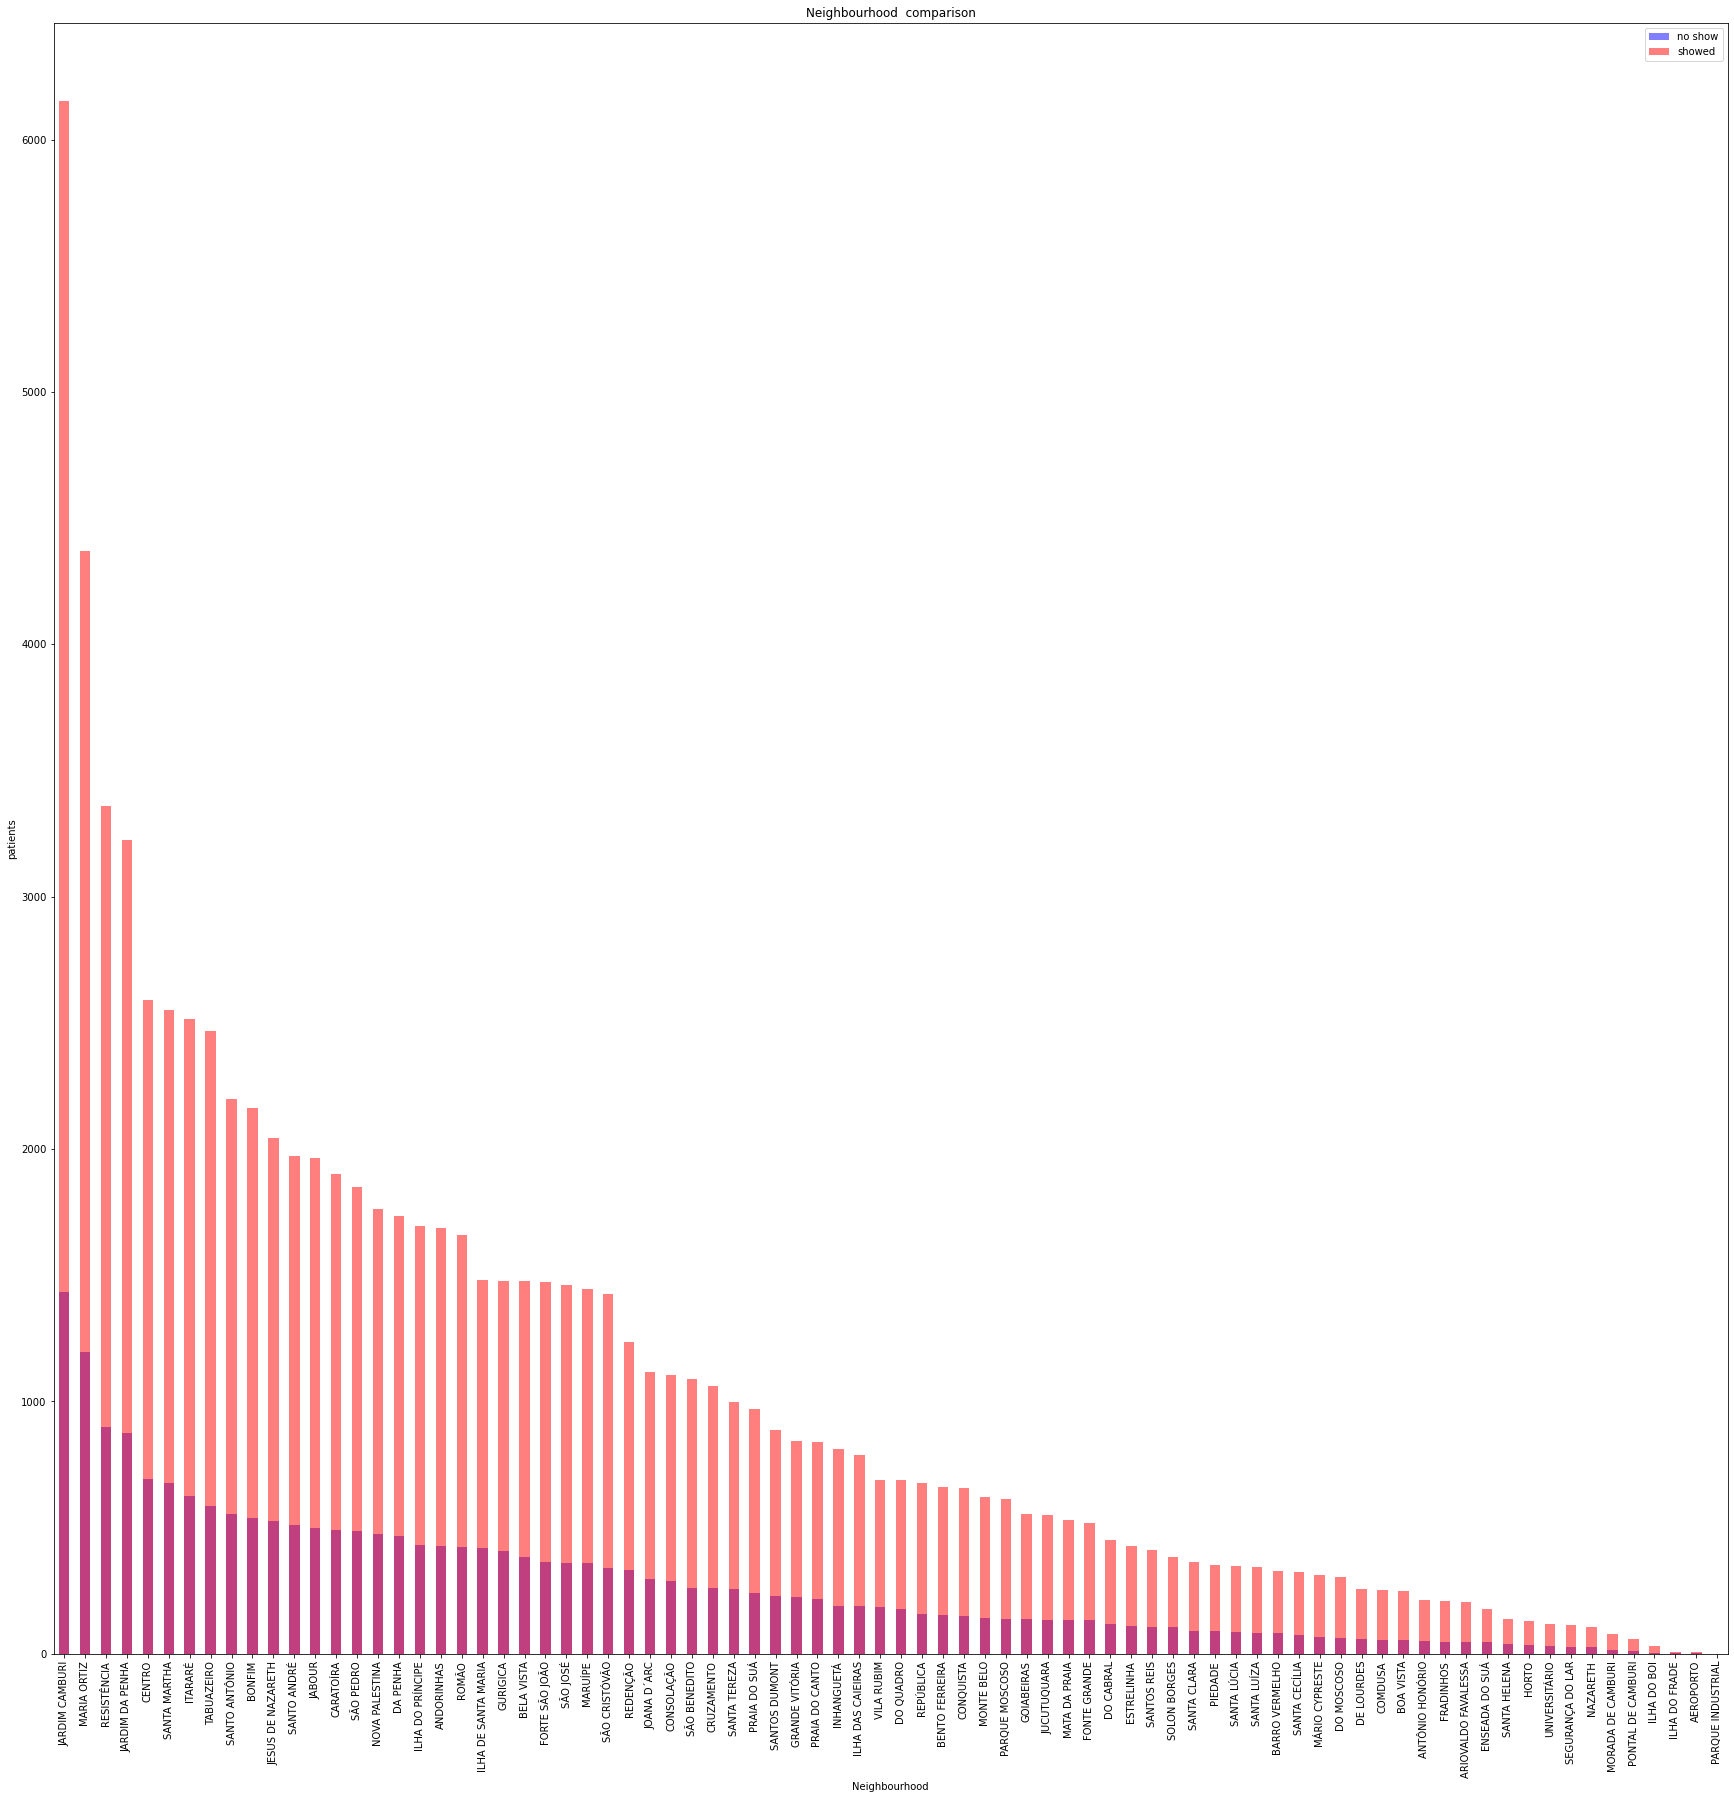

In [22]:
stacked_chart('Neighbourhood',30)

###### Nigbourhood: some nighbourhood have more showing up ratios more than the others as "jardim camburi